<a href="https://colab.research.google.com/github/basanab/mu_e_scatt/blob/main/Elastic_events.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
pip install uproot    # install root module

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot
import math as mt

In [120]:
file = uproot.open("/content/Be10cr_CR_200to1TeV.root") # read the root file

In [121]:
file.keys()
file.classnames()
branch=file["mu_e_scatt"]
branch.keys()

['event_id',
 'mu_x',
 'mu_y',
 'mu_z',
 'e_x',
 'e_y',
 'e_z',
 'mu_E',
 'electron_E',
 'mu_px',
 'mu_py',
 'mu_pz',
 'e_px',
 'e_py',
 'e_pz',
 'scat_type']

In [123]:
Be10cr_CR_200to1TeV=branch.arrays(['event_id', 'mu_x', 'mu_y', 'mu_z', 'e_x', 'e_y', 'e_z', 'mu_E','electron_E','mu_px',
 'mu_py',
 'mu_pz',
 'e_px',
 'e_py',
 'e_pz',
 'scat_type'], library="pd")

In [124]:
Be10cr_CR_200to1TeV

,event_id,mu_x,mu_y,mu_z,e_x,e_y,e_z,mu_E,electron_E,mu_px,mu_py,mu_pz,e_px,e_py,e_pz,scat_type
0,100000.0,0.000000e+00,0.000000e+00,-3.36112,0.000000,0.000000,0.00000,453225.457935,0.000000,-0.017054,0.023448,-453331.103993,0.000000,0.000000,0.000000,2.534557e-321
1,106214.0,6.124413e-06,2.113595e-05,-3.36112,-0.319225,-1.086742,-3.36112,462773.414714,8.987563,0.850363,2.910391,-462879.061017,-0.856238,-2.912558,-8.985846,1.000000e+00
2,370034.0,-1.451628e-06,-1.233474e-05,-3.36112,0.320250,3.489465,-3.36112,272078.157820,0.979815,-0.117557,-0.998893,-272183.795682,0.101932,0.992066,-0.983270,1.000000e+00
3,378992.0,6.724238e-06,4.891661e-06,-3.36112,-3.865505,-2.731283,-3.36112,296674.889776,0.525935,0.593804,0.431972,-296780.529339,-0.616257,-0.390810,-0.530666,1.000000e+00
4,1343526.0,-2.156223e-10,5.211872e-10,-3.36112,0.000063,-0.000147,-3.36112,290642.435317,1.027446,-0.390925,0.944917,-290748.074489,0.407391,-0.931406,-1.035475,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,97857339.0,6.630298e-08,-9.146218e-10,-3.36112,-0.000643,0.000144,-3.36112,210595.892854,0.574397,0.751760,-0.167674,-210701.524732,-0.762929,0.174054,-0.551913,1.000000e+00
5430,97859710.0,7.436453e-05,1.068927e-05,-3.36112,-0.468960,-0.067296,-3.36112,323853.721364,51.317058,7.167700,1.030296,-323959.362425,-7.158186,-1.016015,-51.318754,1.000000e+00
5431,98488244.0,-1.576166e-06,4.395799e-06,-3.36112,1.229380,-3.251348,-3.36112,706424.723242,0.934384,-0.320635,0.953706,-706530.373712,0.336282,-0.916882,-0.935015,1.000000e+00
5432,98850724.0,-2.193000e-06,-4.607778e-06,-3.36112,2.315633,4.980538,-3.36112,418675.200311,0.395493,-0.273253,-0.574141,-418780.845353,0.269425,0.580989,-0.387904,1.000000e+00


In [125]:
# To separate the events having only muon and electron i.e. sactt_type=1
df_sort1=Be10cr_CR_200to1TeV[Be10cr_CR_200to1TeV['scat_type']==1]
df_sort1

,event_id,mu_x,mu_y,mu_z,e_x,e_y,e_z,mu_E,electron_E,mu_px,mu_py,mu_pz,e_px,e_py,e_pz,scat_type
1,106214.0,6.124413e-06,2.113595e-05,-3.36112,-0.319225,-1.086742,-3.36112,462773.414714,8.987563,0.850363,2.910391,-462879.061017,-0.856238,-2.912558,-8.985846,1.0
2,370034.0,-1.451628e-06,-1.233474e-05,-3.36112,0.320250,3.489465,-3.36112,272078.157820,0.979815,-0.117557,-0.998893,-272183.795682,0.101932,0.992066,-0.983270,1.0
3,378992.0,6.724238e-06,4.891661e-06,-3.36112,-3.865505,-2.731283,-3.36112,296674.889776,0.525935,0.593804,0.431972,-296780.529339,-0.616257,-0.390810,-0.530666,1.0
4,1343526.0,-2.156223e-10,5.211872e-10,-3.36112,0.000063,-0.000147,-3.36112,290642.435317,1.027446,-0.390925,0.944917,-290748.074489,0.407391,-0.931406,-1.035475,1.0
6,1658083.0,-1.014960e-09,5.808666e-10,-3.36112,0.000239,-0.000137,-3.36112,645699.171552,2.743013,-1.453210,0.831679,-645804.821278,1.438664,-0.848705,-2.745436,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,97857339.0,6.630298e-08,-9.146218e-10,-3.36112,-0.000643,0.000144,-3.36112,210595.892854,0.574397,0.751760,-0.167674,-210701.524732,-0.762929,0.174054,-0.551913,1.0
5430,97859710.0,7.436453e-05,1.068927e-05,-3.36112,-0.468960,-0.067296,-3.36112,323853.721364,51.317058,7.167700,1.030296,-323959.362425,-7.158186,-1.016015,-51.318754,1.0
5431,98488244.0,-1.576166e-06,4.395799e-06,-3.36112,1.229380,-3.251348,-3.36112,706424.723242,0.934384,-0.320635,0.953706,-706530.373712,0.336282,-0.916882,-0.935015,1.0
5432,98850724.0,-2.193000e-06,-4.607778e-06,-3.36112,2.315633,4.980538,-3.36112,418675.200311,0.395493,-0.273253,-0.574141,-418780.845353,0.269425,0.580989,-0.387904,1.0


In [126]:
#reset index without adding new column "index" , as drop=true
df_sort1.reset_index(level=None, drop=True, inplace=True)
df_sort1

,event_id,mu_x,mu_y,mu_z,e_x,e_y,e_z,mu_E,electron_E,mu_px,mu_py,mu_pz,e_px,e_py,e_pz,scat_type
0,106214.0,6.124413e-06,2.113595e-05,-3.36112,-0.319225,-1.086742,-3.36112,462773.414714,8.987563,0.850363,2.910391,-462879.061017,-0.856238,-2.912558,-8.985846,1.0
1,370034.0,-1.451628e-06,-1.233474e-05,-3.36112,0.320250,3.489465,-3.36112,272078.157820,0.979815,-0.117557,-0.998893,-272183.795682,0.101932,0.992066,-0.983270,1.0
2,378992.0,6.724238e-06,4.891661e-06,-3.36112,-3.865505,-2.731283,-3.36112,296674.889776,0.525935,0.593804,0.431972,-296780.529339,-0.616257,-0.390810,-0.530666,1.0
3,1343526.0,-2.156223e-10,5.211872e-10,-3.36112,0.000063,-0.000147,-3.36112,290642.435317,1.027446,-0.390925,0.944917,-290748.074489,0.407391,-0.931406,-1.035475,1.0
4,1658083.0,-1.014960e-09,5.808666e-10,-3.36112,0.000239,-0.000137,-3.36112,645699.171552,2.743013,-1.453210,0.831679,-645804.821278,1.438664,-0.848705,-2.745436,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360,97857339.0,6.630298e-08,-9.146218e-10,-3.36112,-0.000643,0.000144,-3.36112,210595.892854,0.574397,0.751760,-0.167674,-210701.524732,-0.762929,0.174054,-0.551913,1.0
5361,97859710.0,7.436453e-05,1.068927e-05,-3.36112,-0.468960,-0.067296,-3.36112,323853.721364,51.317058,7.167700,1.030296,-323959.362425,-7.158186,-1.016015,-51.318754,1.0
5362,98488244.0,-1.576166e-06,4.395799e-06,-3.36112,1.229380,-3.251348,-3.36112,706424.723242,0.934384,-0.320635,0.953706,-706530.373712,0.336282,-0.916882,-0.935015,1.0
5363,98850724.0,-2.193000e-06,-4.607778e-06,-3.36112,2.315633,4.980538,-3.36112,418675.200311,0.395493,-0.273253,-0.574141,-418780.845353,0.269425,0.580989,-0.387904,1.0


In [127]:
#This will give the number of rows in all columns where the value = 1
(df_sort1==1).sum()

event_id         0
mu_x             0
mu_y             0
mu_z             0
e_x              0
e_y              0
e_z              0
mu_E             0
electron_E       0
mu_px            0
mu_py            0
mu_pz            0
e_px             0
e_py             0
e_pz             0
scat_type     5365
dtype: int64

In [128]:
# To get the unit momentum vectors for both electron and muon
muX_cap=[] #for muon unit momentum vector in x-direction
muY_cap=[] #for muon unit momentum vector in y-direction
muZ_cap=[] #for muon unit momentum vector in z-direction
eX_cap=[] #for electron unit momentum vector in x-direction
eY_cap=[] #for electron unit momentum vector in y-direction
eZ_cap=[] #for electron unit momentum vector in z-direction
for i in range(len(df_sort1)):
    den= np.sqrt(df_sort1.iloc[i]['mu_px'] **2 +df_sort1.iloc[i]['mu_py'] **2 +df_sort1.iloc[i]['mu_pz'] **2) # magnitude of muon scattered momentum vector
    den_e= np.sqrt(df_sort1.iloc[i]['e_px'] **2 +df_sort1.iloc[i]['e_py'] **2 +df_sort1.iloc[i]['e_pz'] **2) # magnitude of electron scattered momentum vector

    muX_cap.append(df_sort1.iloc[i]['mu_px']/den)
    muY_cap.append(df_sort1.iloc[i]['mu_py']/den)
    muZ_cap.append (df_sort1.iloc[i]['mu_pz']/den)
    eX_cap.append(df_sort1.iloc[i]['e_px']/den_e)
    eY_cap.append(df_sort1.iloc[i]['e_py']/den_e)
    eZ_cap.append (df_sort1.iloc[i]['e_pz']/den_e)
df_sort1["muPX_cap"]  =   muX_cap
df_sort1["muPY_cap"]  =   muY_cap
df_sort1["muPZ_cap"]  =   muZ_cap
df_sort1["ePX_cap"]  =   eX_cap
df_sort1["ePY_cap"]  =   eY_cap
df_sort1["ePZ_cap"]  =   eZ_cap



<ipython-input-128-6494c74c0c72>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sort1["muPX_cap"]  =   muX_cap
<ipython-input-128-6494c74c0c72>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sort1["muPY_cap"]  =   muY_cap
<ipython-input-128-6494c74c0c72>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [129]:
#This will give the number of rows in all columns where the value = 1
(df_sort1>200000).sum()

event_id      5359
mu_x             0
mu_y             0
mu_z             0
e_x              0
e_y              0
e_z              0
mu_E          5365
electron_E       0
mu_px            0
mu_py            0
mu_pz            0
e_px             0
e_py             0
e_pz             0
scat_type        0
muPX_cap         0
muPY_cap         0
muPZ_cap         0
ePX_cap          0
ePY_cap          0
ePZ_cap          0
dtype: int64

In [130]:
df_sort1 # with added columns of momentum unit vectors

,event_id,mu_x,mu_y,mu_z,e_x,e_y,e_z,mu_E,electron_E,mu_px,...,e_px,e_py,e_pz,scat_type,muPX_cap,muPY_cap,muPZ_cap,ePX_cap,ePY_cap,ePZ_cap
0,106214.0,6.124413e-06,2.113595e-05,-3.36112,-0.319225,-1.086742,-3.36112,462773.414714,8.987563,0.850363,...,-0.856238,-2.912558,-8.985846,1.0,1.837116e-06,6.287584e-06,-1.0,-0.090275,-0.307076,-0.947394
1,370034.0,-1.451628e-06,-1.233474e-05,-3.36112,0.320250,3.489465,-3.36112,272078.157820,0.979815,-0.117557,...,0.101932,0.992066,-0.983270,1.0,-4.319031e-07,-3.669920e-06,-1.0,0.072783,0.708365,-0.702084
2,378992.0,6.724238e-06,4.891661e-06,-3.36112,-3.865505,-2.731283,-3.36112,296674.889776,0.525935,0.593804,...,-0.616257,-0.390810,-0.530666,1.0,2.000817e-06,1.455528e-06,-1.0,-0.682999,-0.433136,-0.588138
3,1343526.0,-2.156223e-10,5.211872e-10,-3.36112,0.000063,-0.000147,-3.36112,290642.435317,1.027446,-0.390925,...,0.407391,-0.931406,-1.035475,1.0,-1.344550e-06,3.249951e-06,-1.0,0.280746,-0.641862,-0.713579
4,1658083.0,-1.014960e-09,5.808666e-10,-3.36112,0.000239,-0.000137,-3.36112,645699.171552,2.743013,-1.453210,...,1.438664,-0.848705,-2.745436,1.0,-2.250231e-06,1.287818e-06,-1.0,0.447674,-0.264095,-0.854308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360,97857339.0,6.630298e-08,-9.146218e-10,-3.36112,-0.000643,0.000144,-3.36112,210595.892854,0.574397,0.751760,...,-0.762929,0.174054,-0.551913,1.0,3.567889e-06,-7.957886e-07,-1.0,-0.796724,0.181764,-0.576361
5361,97859710.0,7.436453e-05,1.068927e-05,-3.36112,-0.468960,-0.067296,-3.36112,323853.721364,51.317058,7.167700,...,-7.158186,-1.016015,-51.318754,1.0,2.212531e-05,3.180323e-06,-1.0,-0.138121,-0.019605,-0.990221
5362,98488244.0,-1.576166e-06,4.395799e-06,-3.36112,1.229380,-3.251348,-3.36112,706424.723242,0.934384,-0.320635,...,0.336282,-0.916882,-0.935015,1.0,-4.538165e-07,1.349844e-06,-1.0,0.248722,-0.678147,-0.691559
5363,98850724.0,-2.193000e-06,-4.607778e-06,-3.36112,2.315633,4.980538,-3.36112,418675.200311,0.395493,-0.273253,...,0.269425,0.580989,-0.387904,1.0,-6.524972e-07,-1.370981e-06,-1.0,0.359839,0.775958,-0.518078


In [131]:
# To find the coplanarity condition (determinant= 0) od the momentum unit vectors
deter_unit=[] # for determinant of events

for i in range(len(df_sort1)):
    matx=np.array([[0,0,-1.0],[df_sort1["muPX_cap"][i],df_sort1["muPY_cap"][i],df_sort1["muPZ_cap"][i]],[df_sort1["ePX_cap"][i],df_sort1["ePY_cap"][i],df_sort1["ePZ_cap"][i]]])
    deter_unit.append(np.linalg.det(matx))
    # print(matx)
#momentum units are taken as MeV/c in Geant4
# print(deter_unit)


In [132]:
df_sort1["deter_momCAP"]=deter_unit

<ipython-input-132-71598172b677>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sort1["deter_momCAP"]=deter_unit


In [133]:
df_sort1 # WITH UNIT MOMENTUM VECTOR DETERMINANT

,event_id,mu_x,mu_y,mu_z,e_x,e_y,e_z,mu_E,electron_E,mu_px,...,e_py,e_pz,scat_type,muPX_cap,muPY_cap,muPZ_cap,ePX_cap,ePY_cap,ePZ_cap,deter_momCAP
0,106214.0,6.124413e-06,2.113595e-05,-3.36112,-0.319225,-1.086742,-3.36112,462773.414714,8.987563,0.850363,...,-2.912558,-8.985846,1.0,1.837116e-06,6.287584e-06,-1.0,-0.090275,-0.307076,-0.947394,-3.475150e-09
1,370034.0,-1.451628e-06,-1.233474e-05,-3.36112,0.320250,3.489465,-3.36112,272078.157820,0.979815,-0.117557,...,0.992066,-0.983270,1.0,-4.319031e-07,-3.669920e-06,-1.0,0.072783,0.708365,-0.702084,3.883893e-08
2,378992.0,6.724238e-06,4.891661e-06,-3.36112,-3.865505,-2.731283,-3.36112,296674.889776,0.525935,0.593804,...,-0.390810,-0.530666,1.0,2.000817e-06,1.455528e-06,-1.0,-0.682999,-0.433136,-0.588138,-1.274980e-07
3,1343526.0,-2.156223e-10,5.211872e-10,-3.36112,0.000063,-0.000147,-3.36112,290642.435317,1.027446,-0.390925,...,-0.931406,-1.035475,1.0,-1.344550e-06,3.249951e-06,-1.0,0.280746,-0.641862,-0.713579,4.939650e-08
4,1658083.0,-1.014960e-09,5.808666e-10,-3.36112,0.000239,-0.000137,-3.36112,645699.171552,2.743013,-1.453210,...,-0.848705,-2.745436,1.0,-2.250231e-06,1.287818e-06,-1.0,0.447674,-0.264095,-0.854308,-1.775081e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360,97857339.0,6.630298e-08,-9.146218e-10,-3.36112,-0.000643,0.000144,-3.36112,210595.892854,0.574397,0.751760,...,0.174054,-0.551913,1.0,3.567889e-06,-7.957886e-07,-1.0,-0.796724,0.181764,-0.576361,-1.449075e-08
5361,97859710.0,7.436453e-05,1.068927e-05,-3.36112,-0.468960,-0.067296,-3.36112,323853.721364,51.317058,7.167700,...,-1.016015,-51.318754,1.0,2.212531e-05,3.180323e-06,-1.0,-0.138121,-0.019605,-0.990221,-5.512927e-09
5362,98488244.0,-1.576166e-06,4.395799e-06,-3.36112,1.229380,-3.251348,-3.36112,706424.723242,0.934384,-0.320635,...,-0.916882,-0.935015,1.0,-4.538165e-07,1.349844e-06,-1.0,0.248722,-0.678147,-0.691559,2.798165e-08
5363,98850724.0,-2.193000e-06,-4.607778e-06,-3.36112,2.315633,4.980538,-3.36112,418675.200311,0.395493,-0.273253,...,0.580989,-0.387904,1.0,-6.524972e-07,-1.370981e-06,-1.0,0.359839,0.775958,-0.518078,1.297792e-08


In [143]:
# To separate the events with determinant equals to 0 or with maximum error of 10^(-5)
unit_mom_sort=df_sort1[ (abs(df_sort1['deter_momCAP'])>=0.0) & (abs(df_sort1['deter_momCAP'])<1e-05)]
# unit_mom_sort=df_sort1[ df_sort1['deter_momCAP']==0]
unit_mom_sort

,event_id,mu_x,mu_y,mu_z,e_x,e_y,e_z,mu_E,electron_E,mu_px,...,e_py,e_pz,scat_type,muPX_cap,muPY_cap,muPZ_cap,ePX_cap,ePY_cap,ePZ_cap,deter_momCAP
0,106214.0,6.124413e-06,2.113595e-05,-3.36112,-0.319225,-1.086742,-3.36112,462773.414714,8.987563,0.850363,...,-2.912558,-8.985846,1.0,1.837116e-06,6.287584e-06,-1.0,-0.090275,-0.307076,-0.947394,-3.475150e-09
1,370034.0,-1.451628e-06,-1.233474e-05,-3.36112,0.320250,3.489465,-3.36112,272078.157820,0.979815,-0.117557,...,0.992066,-0.983270,1.0,-4.319031e-07,-3.669920e-06,-1.0,0.072783,0.708365,-0.702084,3.883893e-08
2,378992.0,6.724238e-06,4.891661e-06,-3.36112,-3.865505,-2.731283,-3.36112,296674.889776,0.525935,0.593804,...,-0.390810,-0.530666,1.0,2.000817e-06,1.455528e-06,-1.0,-0.682999,-0.433136,-0.588138,-1.274980e-07
3,1343526.0,-2.156223e-10,5.211872e-10,-3.36112,0.000063,-0.000147,-3.36112,290642.435317,1.027446,-0.390925,...,-0.931406,-1.035475,1.0,-1.344550e-06,3.249951e-06,-1.0,0.280746,-0.641862,-0.713579,4.939650e-08
4,1658083.0,-1.014960e-09,5.808666e-10,-3.36112,0.000239,-0.000137,-3.36112,645699.171552,2.743013,-1.453210,...,-0.848705,-2.745436,1.0,-2.250231e-06,1.287818e-06,-1.0,0.447674,-0.264095,-0.854308,-1.775081e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360,97857339.0,6.630298e-08,-9.146218e-10,-3.36112,-0.000643,0.000144,-3.36112,210595.892854,0.574397,0.751760,...,0.174054,-0.551913,1.0,3.567889e-06,-7.957886e-07,-1.0,-0.796724,0.181764,-0.576361,-1.449075e-08
5361,97859710.0,7.436453e-05,1.068927e-05,-3.36112,-0.468960,-0.067296,-3.36112,323853.721364,51.317058,7.167700,...,-1.016015,-51.318754,1.0,2.212531e-05,3.180323e-06,-1.0,-0.138121,-0.019605,-0.990221,-5.512927e-09
5362,98488244.0,-1.576166e-06,4.395799e-06,-3.36112,1.229380,-3.251348,-3.36112,706424.723242,0.934384,-0.320635,...,-0.916882,-0.935015,1.0,-4.538165e-07,1.349844e-06,-1.0,0.248722,-0.678147,-0.691559,2.798165e-08
5363,98850724.0,-2.193000e-06,-4.607778e-06,-3.36112,2.315633,4.980538,-3.36112,418675.200311,0.395493,-0.273253,...,0.580989,-0.387904,1.0,-6.524972e-07,-1.370981e-06,-1.0,0.359839,0.775958,-0.518078,1.297792e-08


In [135]:
indexage= unit_mom_sort[(unit_mom_sort['e_pz']==0.0)].index
# indexage
unit_mom_sort.drop(indexage , inplace=True)
unit_mom_sort

,event_id,mu_x,mu_y,mu_z,e_x,e_y,e_z,mu_E,electron_E,mu_px,...,e_py,e_pz,scat_type,muPX_cap,muPY_cap,muPZ_cap,ePX_cap,ePY_cap,ePZ_cap,deter_momCAP
0,106214.0,6.124413e-06,2.113595e-05,-3.36112,-0.319225,-1.086742,-3.36112,462773.414714,8.987563,0.850363,...,-2.912558,-8.985846,1.0,1.837116e-06,6.287584e-06,-1.0,-0.090275,-0.307076,-0.947394,-3.475150e-09
1,370034.0,-1.451628e-06,-1.233474e-05,-3.36112,0.320250,3.489465,-3.36112,272078.157820,0.979815,-0.117557,...,0.992066,-0.983270,1.0,-4.319031e-07,-3.669920e-06,-1.0,0.072783,0.708365,-0.702084,3.883893e-08
2,378992.0,6.724238e-06,4.891661e-06,-3.36112,-3.865505,-2.731283,-3.36112,296674.889776,0.525935,0.593804,...,-0.390810,-0.530666,1.0,2.000817e-06,1.455528e-06,-1.0,-0.682999,-0.433136,-0.588138,-1.274980e-07
3,1343526.0,-2.156223e-10,5.211872e-10,-3.36112,0.000063,-0.000147,-3.36112,290642.435317,1.027446,-0.390925,...,-0.931406,-1.035475,1.0,-1.344550e-06,3.249951e-06,-1.0,0.280746,-0.641862,-0.713579,4.939650e-08
4,1658083.0,-1.014960e-09,5.808666e-10,-3.36112,0.000239,-0.000137,-3.36112,645699.171552,2.743013,-1.453210,...,-0.848705,-2.745436,1.0,-2.250231e-06,1.287818e-06,-1.0,0.447674,-0.264095,-0.854308,-1.775081e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360,97857339.0,6.630298e-08,-9.146218e-10,-3.36112,-0.000643,0.000144,-3.36112,210595.892854,0.574397,0.751760,...,0.174054,-0.551913,1.0,3.567889e-06,-7.957886e-07,-1.0,-0.796724,0.181764,-0.576361,-1.449075e-08
5361,97859710.0,7.436453e-05,1.068927e-05,-3.36112,-0.468960,-0.067296,-3.36112,323853.721364,51.317058,7.167700,...,-1.016015,-51.318754,1.0,2.212531e-05,3.180323e-06,-1.0,-0.138121,-0.019605,-0.990221,-5.512927e-09
5362,98488244.0,-1.576166e-06,4.395799e-06,-3.36112,1.229380,-3.251348,-3.36112,706424.723242,0.934384,-0.320635,...,-0.916882,-0.935015,1.0,-4.538165e-07,1.349844e-06,-1.0,0.248722,-0.678147,-0.691559,2.798165e-08
5363,98850724.0,-2.193000e-06,-4.607778e-06,-3.36112,2.315633,4.980538,-3.36112,418675.200311,0.395493,-0.273253,...,0.580989,-0.387904,1.0,-6.524972e-07,-1.370981e-06,-1.0,0.359839,0.775958,-0.518078,1.297792e-08


In [144]:
#reset index without adding new column "index" , as drop=true
unit_mom_sort.reset_index(level=None, drop=True, inplace=True)
unit_mom_sort

,event_id,mu_x,mu_y,mu_z,e_x,e_y,e_z,mu_E,electron_E,mu_px,...,e_py,e_pz,scat_type,muPX_cap,muPY_cap,muPZ_cap,ePX_cap,ePY_cap,ePZ_cap,deter_momCAP
0,106214.0,6.124413e-06,2.113595e-05,-3.36112,-0.319225,-1.086742,-3.36112,462773.414714,8.987563,0.850363,...,-2.912558,-8.985846,1.0,1.837116e-06,6.287584e-06,-1.0,-0.090275,-0.307076,-0.947394,-3.475150e-09
1,370034.0,-1.451628e-06,-1.233474e-05,-3.36112,0.320250,3.489465,-3.36112,272078.157820,0.979815,-0.117557,...,0.992066,-0.983270,1.0,-4.319031e-07,-3.669920e-06,-1.0,0.072783,0.708365,-0.702084,3.883893e-08
2,378992.0,6.724238e-06,4.891661e-06,-3.36112,-3.865505,-2.731283,-3.36112,296674.889776,0.525935,0.593804,...,-0.390810,-0.530666,1.0,2.000817e-06,1.455528e-06,-1.0,-0.682999,-0.433136,-0.588138,-1.274980e-07
3,1343526.0,-2.156223e-10,5.211872e-10,-3.36112,0.000063,-0.000147,-3.36112,290642.435317,1.027446,-0.390925,...,-0.931406,-1.035475,1.0,-1.344550e-06,3.249951e-06,-1.0,0.280746,-0.641862,-0.713579,4.939650e-08
4,1658083.0,-1.014960e-09,5.808666e-10,-3.36112,0.000239,-0.000137,-3.36112,645699.171552,2.743013,-1.453210,...,-0.848705,-2.745436,1.0,-2.250231e-06,1.287818e-06,-1.0,0.447674,-0.264095,-0.854308,-1.775081e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360,97857339.0,6.630298e-08,-9.146218e-10,-3.36112,-0.000643,0.000144,-3.36112,210595.892854,0.574397,0.751760,...,0.174054,-0.551913,1.0,3.567889e-06,-7.957886e-07,-1.0,-0.796724,0.181764,-0.576361,-1.449075e-08
5361,97859710.0,7.436453e-05,1.068927e-05,-3.36112,-0.468960,-0.067296,-3.36112,323853.721364,51.317058,7.167700,...,-1.016015,-51.318754,1.0,2.212531e-05,3.180323e-06,-1.0,-0.138121,-0.019605,-0.990221,-5.512927e-09
5362,98488244.0,-1.576166e-06,4.395799e-06,-3.36112,1.229380,-3.251348,-3.36112,706424.723242,0.934384,-0.320635,...,-0.916882,-0.935015,1.0,-4.538165e-07,1.349844e-06,-1.0,0.248722,-0.678147,-0.691559,2.798165e-08
5363,98850724.0,-2.193000e-06,-4.607778e-06,-3.36112,2.315633,4.980538,-3.36112,418675.200311,0.395493,-0.273253,...,0.580989,-0.387904,1.0,-6.524972e-07,-1.370981e-06,-1.0,0.359839,0.775958,-0.518078,1.297792e-08


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

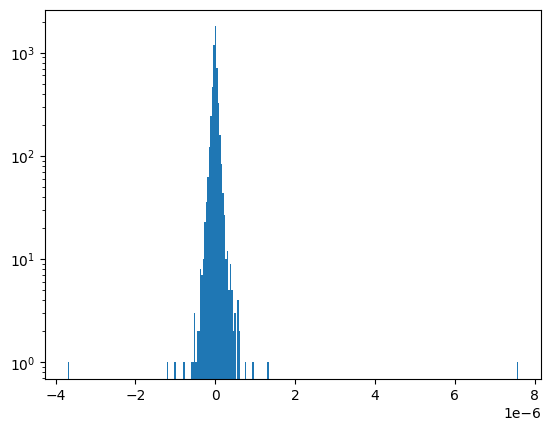

In [145]:
#Histogram of determinant
plt.hist(unit_mom_sort["deter_momCAP"],log =True, bins= 300)

In [146]:
# to check the position values of mu and e
print(unit_mom_sort.iloc[0]['mu_z'])
print(unit_mom_sort.iloc[0]['e_z'])
unit_mom_sort.query("e_z!=-3.3611195652173915").index # to get the index of the e_z != -3.3611195652173915
# unit_mom_sort.query("mu_z!=-3.3611195652173915").index # to get the index of the e_z != -3.3611195652173915

-3.3611195652173915
-3.3611195652173915


Int64Index([], dtype='int64')

In [ ]:
# print(unit_mom_sort.iloc[1984]["mu_E"])
# print(unit_mom_sort.iloc[5298]["e_z"])

247529.6801355926


In [147]:
# To subtract the thickness of target
unit_mom_sort['mu_z'] = unit_mom_sort["mu_z"]+1.5#units are in mm
unit_mom_sort['e_z'] = unit_mom_sort['e_z']+1.5

In [148]:
unit_mom_sort # with subtracted target thickness

,event_id,mu_x,mu_y,mu_z,e_x,e_y,e_z,mu_E,electron_E,mu_px,...,e_py,e_pz,scat_type,muPX_cap,muPY_cap,muPZ_cap,ePX_cap,ePY_cap,ePZ_cap,deter_momCAP
0,106214.0,6.124413e-06,2.113595e-05,-1.86112,-0.319225,-1.086742,-1.86112,462773.414714,8.987563,0.850363,...,-2.912558,-8.985846,1.0,1.837116e-06,6.287584e-06,-1.0,-0.090275,-0.307076,-0.947394,-3.475150e-09
1,370034.0,-1.451628e-06,-1.233474e-05,-1.86112,0.320250,3.489465,-1.86112,272078.157820,0.979815,-0.117557,...,0.992066,-0.983270,1.0,-4.319031e-07,-3.669920e-06,-1.0,0.072783,0.708365,-0.702084,3.883893e-08
2,378992.0,6.724238e-06,4.891661e-06,-1.86112,-3.865505,-2.731283,-1.86112,296674.889776,0.525935,0.593804,...,-0.390810,-0.530666,1.0,2.000817e-06,1.455528e-06,-1.0,-0.682999,-0.433136,-0.588138,-1.274980e-07
3,1343526.0,-2.156223e-10,5.211872e-10,-1.86112,0.000063,-0.000147,-1.86112,290642.435317,1.027446,-0.390925,...,-0.931406,-1.035475,1.0,-1.344550e-06,3.249951e-06,-1.0,0.280746,-0.641862,-0.713579,4.939650e-08
4,1658083.0,-1.014960e-09,5.808666e-10,-1.86112,0.000239,-0.000137,-1.86112,645699.171552,2.743013,-1.453210,...,-0.848705,-2.745436,1.0,-2.250231e-06,1.287818e-06,-1.0,0.447674,-0.264095,-0.854308,-1.775081e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360,97857339.0,6.630298e-08,-9.146218e-10,-1.86112,-0.000643,0.000144,-1.86112,210595.892854,0.574397,0.751760,...,0.174054,-0.551913,1.0,3.567889e-06,-7.957886e-07,-1.0,-0.796724,0.181764,-0.576361,-1.449075e-08
5361,97859710.0,7.436453e-05,1.068927e-05,-1.86112,-0.468960,-0.067296,-1.86112,323853.721364,51.317058,7.167700,...,-1.016015,-51.318754,1.0,2.212531e-05,3.180323e-06,-1.0,-0.138121,-0.019605,-0.990221,-5.512927e-09
5362,98488244.0,-1.576166e-06,4.395799e-06,-1.86112,1.229380,-3.251348,-1.86112,706424.723242,0.934384,-0.320635,...,-0.916882,-0.935015,1.0,-4.538165e-07,1.349844e-06,-1.0,0.248722,-0.678147,-0.691559,2.798165e-08
5363,98850724.0,-2.193000e-06,-4.607778e-06,-1.86112,2.315633,4.980538,-1.86112,418675.200311,0.395493,-0.273253,...,0.580989,-0.387904,1.0,-6.524972e-07,-1.370981e-06,-1.0,0.359839,0.775958,-0.518078,1.297792e-08


In [149]:
#to find the scattered angles of muon and electron
BeCAP_tmu200_1Tev =np.pi-np.arccos( unit_mom_sort.iloc[:,3]/np.sqrt( unit_mom_sort.iloc[:,1]**2+  unit_mom_sort.iloc[:,2]**2+  unit_mom_sort.iloc[:,3]**2))
BeCAP_te200_1Tev = np.pi -np.arccos( unit_mom_sort.iloc[:,6]/np.sqrt( unit_mom_sort.iloc[:,4]**2+  unit_mom_sort.iloc[:,5]**2+  unit_mom_sort.iloc[:,6]**2))
unit_mom_sort["te"]=BeCAP_te200_1Tev
unit_mom_sort["tm"]= BeCAP_tmu200_1Tev
unit_mom_sort

,event_id,mu_x,mu_y,mu_z,e_x,e_y,e_z,mu_E,electron_E,mu_px,...,scat_type,muPX_cap,muPY_cap,muPZ_cap,ePX_cap,ePY_cap,ePZ_cap,deter_momCAP,te,tm
0,106214.0,6.124413e-06,2.113595e-05,-1.86112,-0.319225,-1.086742,-1.86112,462773.414714,8.987563,0.850363,...,1.0,1.837116e-06,6.287584e-06,-1.0,-0.090275,-0.307076,-0.947394,-3.475150e-09,0.546711,1.182374e-05
1,370034.0,-1.451628e-06,-1.233474e-05,-1.86112,0.320250,3.489465,-1.86112,272078.157820,0.979815,-0.117557,...,1.0,-4.319031e-07,-3.669920e-06,-1.0,0.072783,0.708365,-0.702084,3.883893e-08,1.082562,6.673325e-06
2,378992.0,6.724238e-06,4.891661e-06,-1.86112,-3.865505,-2.731283,-1.86112,296674.889776,0.525935,0.593804,...,1.0,2.000817e-06,1.455528e-06,-1.0,-0.682999,-0.433136,-0.588138,-1.274980e-07,1.196152,4.467889e-06
3,1343526.0,-2.156223e-10,5.211872e-10,-1.86112,0.000063,-0.000147,-1.86112,290642.435317,1.027446,-0.390925,...,1.0,-1.344550e-06,3.249951e-06,-1.0,0.280746,-0.641862,-0.713579,4.939650e-08,0.000086,0.000000e+00
4,1658083.0,-1.014960e-09,5.808666e-10,-1.86112,0.000239,-0.000137,-1.86112,645699.171552,2.743013,-1.453210,...,1.0,-2.250231e-06,1.287818e-06,-1.0,0.447674,-0.264095,-0.854308,-1.775081e-08,0.000148,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360,97857339.0,6.630298e-08,-9.146218e-10,-1.86112,-0.000643,0.000144,-1.86112,210595.892854,0.574397,0.751760,...,1.0,3.567889e-06,-7.957886e-07,-1.0,-0.796724,0.181764,-0.576361,-1.449075e-08,0.000354,3.332001e-08
5361,97859710.0,7.436453e-05,1.068927e-05,-1.86112,-0.468960,-0.067296,-1.86112,323853.721364,51.317058,7.167700,...,1.0,2.212531e-05,3.180323e-06,-1.0,-0.138121,-0.019605,-0.990221,-5.512927e-09,0.249264,4.036756e-05
5362,98488244.0,-1.576166e-06,4.395799e-06,-1.86112,1.229380,-3.251348,-1.86112,706424.723242,0.934384,-0.320635,...,1.0,-4.538165e-07,1.349844e-06,-1.0,0.248722,-0.678147,-0.691559,2.798165e-08,1.079217,2.509154e-06
5363,98850724.0,-2.193000e-06,-4.607778e-06,-1.86112,2.315633,4.980538,-1.86112,418675.200311,0.395493,-0.273253,...,1.0,-6.524972e-07,-1.370981e-06,-1.0,0.359839,0.775958,-0.518078,1.297792e-08,1.244093,2.741895e-06


In [141]:
new_list = pd.Series(unit_mom_sort['event_id']).drop_duplicates().tolist()
len(new_list)

5365

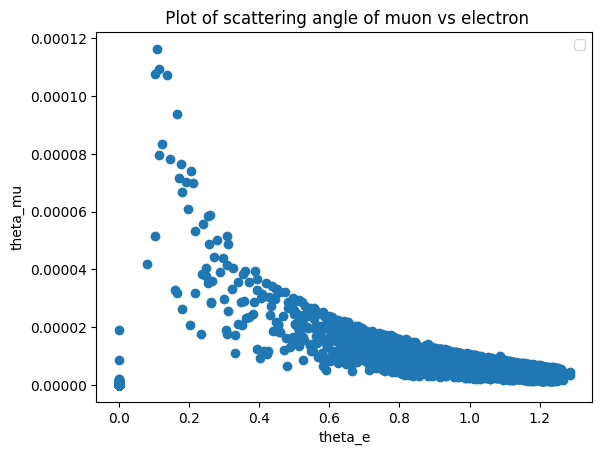

In [150]:
# to plot the theta_mu vs theta_e for 200Gev to 1TeV
plt.scatter(unit_mom_sort["te"],unit_mom_sort['tm'])
plt.title(" Plot of scattering angle of muon vs electron")
plt.xlabel("theta_e")
plt.ylabel("theta_mu")
plt.legend(loc="best")
plt.show()

In [ ]:
# To save the elastic scattering events datasheet in csv file
unit_mom_sort.to_csv('Be10cr_200to1TeV_sorted.csv', header=True, index=False, sep='\t', mode='a')

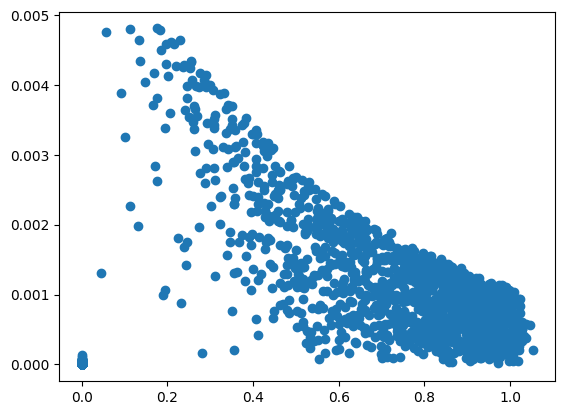

In [ ]:
# to plot the theta_mu vs theta_e for 0.5Gev to 1TeV
# plt.scatter(unit_mom_sort['te'],unit_mom_sort['tm'])

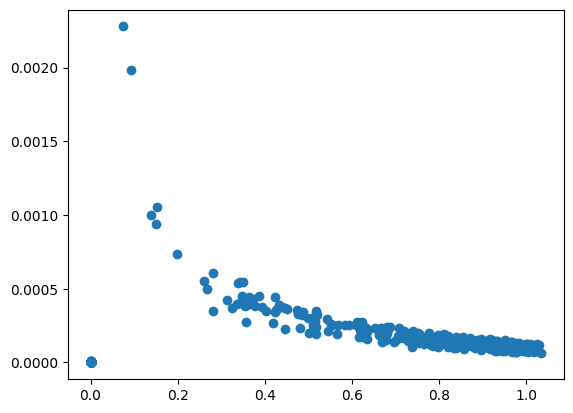

In [ ]:
# #to plot the theta_mu vs theta_e for 5Gev to 10GeV
# plt.scatter(unit_mom_sort['te'],unit_mom_sort['tm'])